In [2]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn
import mlrose_hiive
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import random

In [3]:
def run_and_time_problem(run_problem, problem_name, to_print=True):
    start = time.time()
    best_state, best_fitness = run_problem()
    end = time.time()
    time_diff = end - start
    if to_print:
        print('The {} best state found is: {}'.format(problem_name, best_state))
        print('The {} fitness at the best state is: {}'.format(problem_name, best_fitness))
        print('The {} time elapsed to compute is: {}'.format(problem_name, time_diff))
        print("")
    return(best_state, best_fitness, time_diff)

In [4]:
def train_and_time(algo, times, scores):
    start = time.process_time()
    state, top_score = algo()
    end = time.process_time()
    times.append(end - start)
    scores.append(top_score)

### The Flip Flop Problem

Flip flop Problem with  10  points
Flip flop Problem with  20  points
Flip flop Problem with  30  points
Flip flop Problem with  40  points
Flip flop Problem with  50  points
Flip flop Problem with  60  points
Flip flop Problem with  70  points
Flip flop Problem with  80  points
Flip flop Problem with  90  points
Flip flop Problem with  100  points


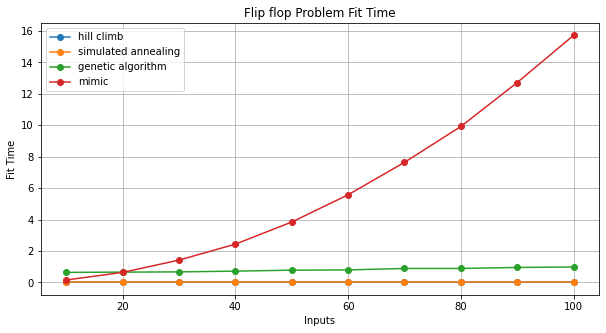

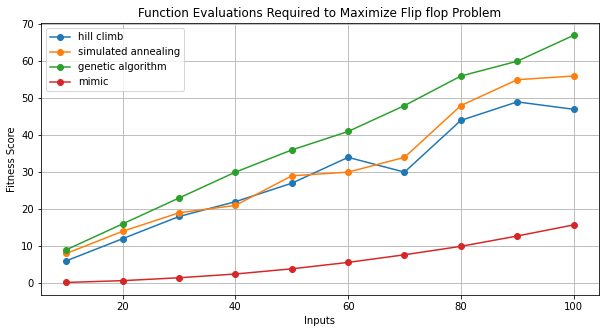

In [6]:
c_hill_times = []
c_hill_scores = []
c_anneal_times = []
c_anneal_scores = []
c_genetic_times = []
c_genetic_scores = []
c_mimic_times = []
c_mimic_scores = []

def run_flip_flop(num_points):
    flip_flop = mlrose.DiscreteOpt(length = num_points, fitness_fn = mlrose.FlipFlop(), max_val=2)
    print ("Flip flop Problem with ", num_points, " points")
    train_and_time(lambda : mlrose.random_hill_climb(problem=flip_flop, max_iters=10),c_hill_times, c_hill_scores)
    train_and_time(lambda : mlrose.simulated_annealing(problem=flip_flop, max_iters=10), c_anneal_times, c_anneal_scores)
    train_and_time(lambda : mlrose.genetic_alg(problem=flip_flop, pop_size=200, mutation_prob = 0.6, max_iters=10), c_genetic_times, c_genetic_scores)
    train_and_time(lambda : mlrose.mimic(problem=flip_flop, max_iters=1), c_mimic_times, c_mimic_scores)
    
point_range = range(10,110,10)
for p in point_range:
    run_flip_flop(p)
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(point_range,c_hill_times,'o-',point_range,c_anneal_times,'o-',point_range,c_genetic_times,'o-', point_range,c_mimic_times,'o-')
plt.title("Flip flop Problem Fit Time")
plt.xlabel("Inputs")
plt.ylabel("Fit Time")
plt.legend(["hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.grid()
plt.show()

plt.plot(point_range,c_hill_scores,'o-',point_range,c_anneal_scores,'o-', point_range,c_genetic_scores,'o-', point_range,c_mimic_times,'o-')
plt.title("Function Evaluations Required to Maximize Flip flop Problem")
plt.xlabel("Inputs")
plt.ylabel("Fitness Score")
plt.legend(["hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.grid()
plt.show()

### The KnapSack Problem

Knapsack Problem with  10  points
Knapsack Problem with  20  points
Knapsack Problem with  30  points
Knapsack Problem with  40  points
Knapsack Problem with  50  points
Knapsack Problem with  60  points
Knapsack Problem with  70  points
Knapsack Problem with  80  points
Knapsack Problem with  90  points
Knapsack Problem with  100  points


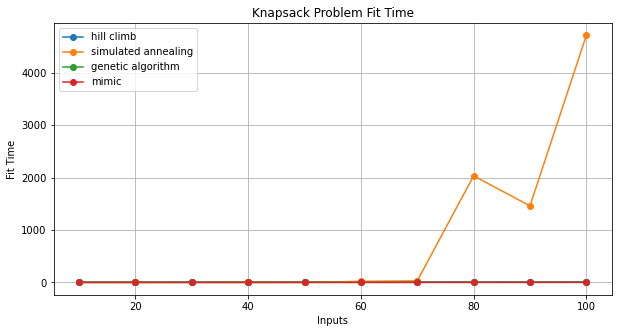

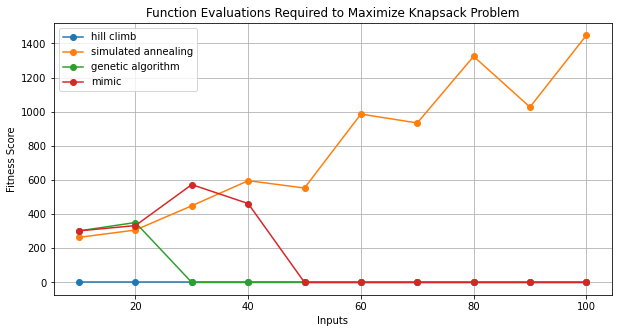

In [7]:
hill_times = []
hill_scores = []
anneal_times = []
anneal_scores = []
genetic_times = []
genetic_scores = []
mimic_times = []
mimic_scores = []

def run_knapsack(num_points):
    weights = list(np.random.randint(low = 1, high = 100, size = num_points))
    values = list(np.random.randint(low = 1, high = 100, size = num_points))
    knapsack = mlrose.DiscreteOpt(length = num_points,fitness_fn = mlrose.Knapsack(weights,values,0.2))
    print ("Knapsack Problem with ", num_points, " points")
    train_and_time(lambda : mlrose.random_hill_climb(problem=knapsack, max_attempts=10),hill_times, hill_scores)
    train_and_time(lambda : mlrose.simulated_annealing(problem=knapsack, max_attempts=10), anneal_times, anneal_scores)
    train_and_time(lambda : mlrose.genetic_alg(problem=knapsack, max_attempts=1, pop_size = 200), genetic_times, genetic_scores)
    train_and_time(lambda : mlrose.mimic(problem=knapsack, max_attempts=10, keep_pct=.20, fast_mimic=True), mimic_times, mimic_scores)
    
point_range = range(10,110,10)
for p in point_range:
    run_knapsack(p)
plt.rcParams["figure.figsize"] = (10,5)

plt.plot(point_range,hill_times,'o-',point_range,anneal_times,'o-',point_range,genetic_times,'o-',point_range,mimic_times,'o-')
plt.title("Knapsack Problem Fit Time")
plt.xlabel("Inputs")
plt.ylabel("Fit Time")
plt.legend(["hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.grid()
plt.show()

plt.plot(point_range,hill_scores,'o-',point_range,anneal_scores,'o-', point_range,genetic_scores,'o-',point_range,mimic_scores,'o-')
plt.title("Function Evaluations Required to Maximize Knapsack Problem")
plt.xlabel("Inputs")
plt.ylabel("Fitness Score")
plt.legend(["hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.grid()
plt.show()

Continuous Peaks Problem with  10  points
Continuous Peaks Problem with  20  points
Continuous Peaks Problem with  30  points
Continuous Peaks Problem with  40  points
Continuous Peaks Problem with  50  points
Continuous Peaks Problem with  60  points
Continuous Peaks Problem with  70  points
Continuous Peaks Problem with  80  points


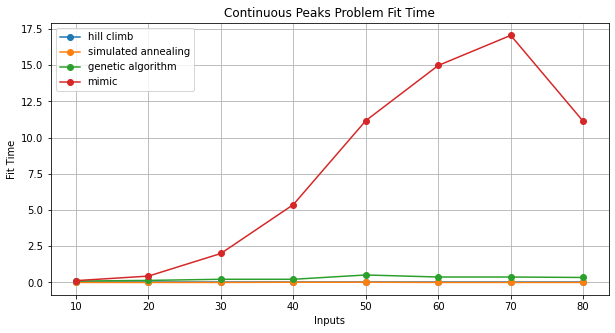

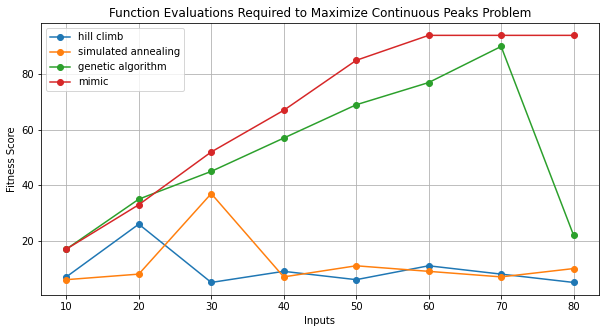

In [15]:
cp_hill_times = []
cp_hill_scores = []
cp_anneal_times = []
cp_anneal_scores = []
cp_genetic_times = []
cp_genetic_scores = []
cp_mimic_times = []
cp_mimic_scores = []

def run_continuous_peaks(num_points):
    continuous_peaks = mlrose.DiscreteOpt(length = num_points,fitness_fn = mlrose.ContinuousPeaks(t_pct=0.15))
    print ("Continuous Peaks Problem with ", num_points, " points")
    train_and_time(lambda : mlrose.random_hill_climb(problem=continuous_peaks, max_attempts=6),cp_hill_times, cp_hill_scores)
    train_and_time(lambda : mlrose.simulated_annealing(problem=continuous_peaks, max_attempts=2), cp_anneal_times, cp_anneal_scores)
    train_and_time(lambda : mlrose.genetic_alg(pop_size = 200, problem=continuous_peaks, max_attempts=6), cp_genetic_times, cp_genetic_scores)
    train_and_time(lambda : mlrose.mimic(pop_size = 400, problem=continuous_peaks, max_attempts=2, mutation_prob = 0.4), cp_mimic_times, cp_mimic_scores)
    
point_range = range(10,90,10)
for p in point_range:
    run_continuous_peaks(p)
plt.rcParams["figure.figsize"] = (10,5)

plt.plot(point_range,cp_hill_times,'o-',point_range,cp_anneal_times,'o-',point_range,cp_genetic_times,'o-',point_range,cp_mimic_times,'o-')
plt.title("Continuous Peaks Problem Fit Time")
plt.xlabel("Inputs")
plt.ylabel("Fit Time")
plt.legend(["hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.grid()
plt.show()

plt.plot(point_range,cp_hill_scores,'o-',point_range,cp_anneal_scores,'o-', point_range,cp_genetic_scores,'o-',point_range,cp_mimic_scores,'o-')
plt.title("Function Evaluations Required to Maximize Continuous Peaks Problem")
plt.xlabel("Inputs")
plt.ylabel("Fitness Score")
plt.legend(["hill climb", "simulated annealing","genetic algorithm","mimic"])
plt.grid()
plt.show()